# Importing Packages

In [3]:
import os,shutil,matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models,optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Loading Cats And Dog Data

In [2]:
length_cat = len(os.listdir(r'/home/hassan-ahmed-khan/Ai Practice/datasets/cats&dogs/Cat'))
length_dog = len(os.listdir(r'/home/hassan-ahmed-khan/Ai Practice/datasets/cats&dogs/Dog'))

In [4]:
print(length_cat)
print(length_dog)

12500
12500


# Paths of Directories

In [5]:
base_dir = r'/home/hassan-ahmed-khan/Ai Practice/datasets/cats&dogs'

dataset_dir = os.path.join(base_dir,'Data')
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')
train_cat_dir = os.path.join(train_dir,'cat')
test_cat_dir = os.path.join(test_dir,'cat')
validation_cat_dir = os.path.join(validation_dir,'cat')
train_dog_dir = os.path.join(train_dir,'dog')
test_dog_dir = os.path.join(test_dir,'dog')
validation_dog_dir = os.path.join(validation_dir,'dog')


# Making Folder

In [49]:
os.mkdir(train_dir)
os.mkdir(test_dir)
os.mkdir(validation_dir)
os.mkdir(train_cat_dir)
os.mkdir(test_cat_dir)
os.mkdir(validation_cat_dir)
os.mkdir(train_dog_dir)
os.mkdir(test_dog_dir)
os.mkdir(validation_dog_dir)

In [6]:
len(os.listdir(dataset_dir))

25000

# Distributing Cats and Dog Images Into 3 Parts (Training, Validation and Test)

In [53]:
train_cats = [f'cat.{i}.jpg' for i in range(1000)]
for cat in train_cats:
    src_dir = os.path.join(dataset_dir,cat)
    dst_dir = os.path.join(train_cat_dir,cat)
    shutil.copyfile(src_dir,dst_dir)


In [52]:
validation_cats = [f'cat.{i}.jpg' for i in range(1000,1500)]
for cat in validation_cats:
    src_dir = os.path.join(dataset_dir,cat)
    dst_dir = os.path.join(validation_cat_dir,cat)
    shutil.copyfile(src_dir,dst_dir)

In [51]:
test_cats = [f'cat.{i}.jpg' for i in range(1500,2000)]
for cat in test_cats:
    src_dir = os.path.join(dataset_dir,cat)
    dst_dir = os.path.join(test_cat_dir,cat)
    shutil.copyfile(src_dir,dst_dir)

In [50]:
train_dogs = [f'dog.{i}.jpg' for i in range(1000)]
for dog in train_dogs:
    src_dir = os.path.join(dataset_dir,dog)
    dst_dir = os.path.join(train_dog_dir,dog)
    shutil.copyfile(src_dir,dst_dir)
    
validation_dogs = [f'dog.{i}.jpg' for i in range(1000,1500)]
for dog in validation_dogs:
    src_dir = os.path.join(dataset_dir,dog)
    dst_dir = os.path.join(validation_dog_dir,dog)
    shutil.copyfile(src_dir,dst_dir)

test_dogs = [f'dog.{i}.jpg' for i in range(1500,2000)]
for dog in test_dogs:
    src_dir = os.path.join(dataset_dir,dog)
    dst_dir = os.path.join(test_dog_dir,dog)
    shutil.copyfile(src_dir,dst_dir)

    

In [6]:
print('total training dog images:', len(os.listdir(test_dog_dir)))

total training dog images: 500


# Making Model Architecture 

In [37]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

# Model Details

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 17, 17, 128)      

# Compile a Model

In [39]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss = 'binary_crossentropy' , metrics=['acc'])
# model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])

#### Making Python Generators For Images By use of ImageDataGenerator  Funtion of Python and also labels the images

In [53]:
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)
train_generator = train_data_gen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator = test_data_gen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [59]:
for data,label in train_generator:
    print(data.shape)
    print(label.shape)
    break

(20, 150, 150, 3)
(20,)


#### Fit or Train the Model on The training Data

In [42]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Epoch 1/30


/tmp/ipykernel_3172/579704996.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)


100/100 [==============================] - 108s 1s/step - loss: 0.6930 - acc: 0.5200 - val_loss: 0.6956 - val_acc: 0.5080
Epoch 2/30
100/100 [==============================] - 140s 1s/step - loss: 0.6694 - acc: 0.5790 - val_loss: 0.6590 - val_acc: 0.5930
Epoch 3/30
100/100 [==============================] - 142s 1s/step - loss: 0.6308 - acc: 0.6310 - val_loss: 0.6620 - val_acc: 0.5940
Epoch 4/30
100/100 [==============================] - 131s 1s/step - loss: 0.5932 - acc: 0.6770 - val_loss: 0.6264 - val_acc: 0.6340
Epoch 5/30
100/100 [==============================] - 138s 1s/step - loss: 0.5580 - acc: 0.7075 - val_loss: 0.6013 - val_acc: 0.6680
Epoch 6/30
100/100 [==============================] - 128s 1s/step - loss: 0.5405 - acc: 0.7255 - val_loss: 0.5930 - val_acc: 0.6960
Epoch 7/30
100/100 [==============================] - 139s 1s/step - loss: 0.5230 - acc: 0.7345 - val_loss: 0.5826 - val_acc: 0.6900
Epoch 8/30
100/100 [==============================] - 146s 1s/step - loss: 0.496

#### Visualizing Training Results

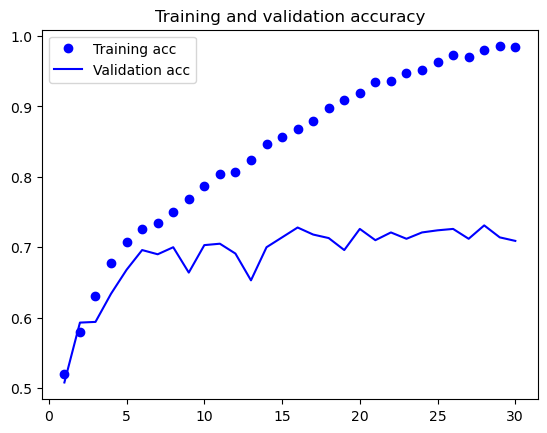

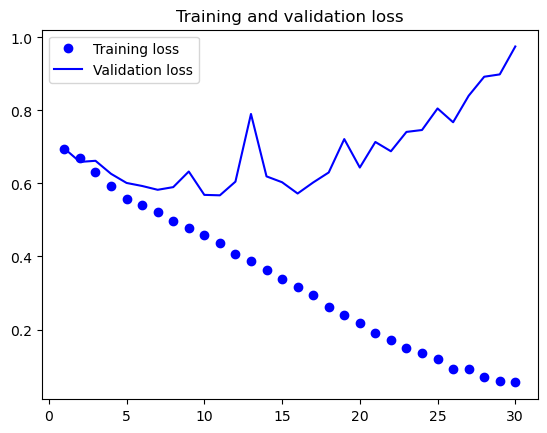

In [48]:
# history.history.keys()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



================================================================================================================

#### 2nd Architecture For Classification Model

#### Making Python Generators For Images By use of ImageDataGenerator  Funtion of Python,applying Data Augmentation and also labels the images

In [55]:
train_data_generator = ImageDataGenerator(rescale=1./255,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,vertical_flip=True,rotation_range=40,zoom_range=0.2)
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator = test_data_generator.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [61]:
for data, label in train_generator:
    print(data.shape)
    print(label.shape)
    break

(20, 150, 150, 3)
(20,)


#### Model Architecture

In [62]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

#### Compiling a Model

In [63]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),loss='binary_crossentropy',metrics=['acc'])

#### Training Or Fitting The Model on Training Data

In [64]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,validation_steps=50)

/tmp/ipykernel_3172/3183105912.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,validation_steps=50)


Epoch 1/100
100/100 [==============================] - 99s 987ms/step - loss: 0.6947 - acc: 0.5120 - val_loss: 0.6901 - val_acc: 0.5400
Epoch 2/100
100/100 [==============================] - 99s 992ms/step - loss: 0.6918 - acc: 0.5250 - val_loss: 0.6844 - val_acc: 0.5020
Epoch 3/100
100/100 [==============================] - 102s 1s/step - loss: 0.6823 - acc: 0.5460 - val_loss: 0.6663 - val_acc: 0.5710
Epoch 4/100
100/100 [==============================] - 102s 1s/step - loss: 0.6713 - acc: 0.5735 - val_loss: 0.6682 - val_acc: 0.5570
Epoch 5/100
100/100 [==============================] - 95s 951ms/step - loss: 0.6683 - acc: 0.5925 - val_loss: 0.6562 - val_acc: 0.5880
Epoch 6/100
100/100 [==============================] - 99s 991ms/step - loss: 0.6609 - acc: 0.5815 - val_loss: 0.6434 - val_acc: 0.6300
Epoch 7/100
100/100 [==============================] - 113s 1s/step - loss: 0.6498 - acc: 0.6105 - val_loss: 0.8080 - val_acc: 0.5150
Epoch 8/100
100/100 [==============================] -

#### Visualizing Training Results

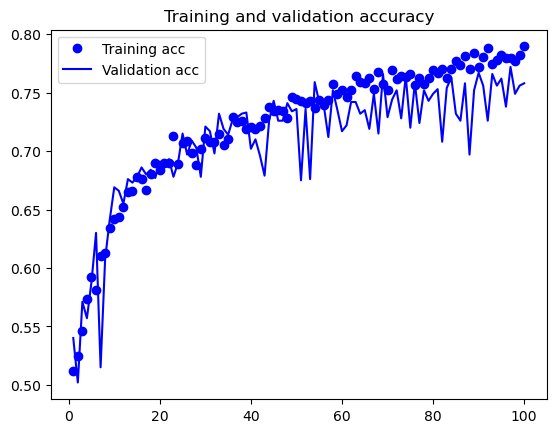

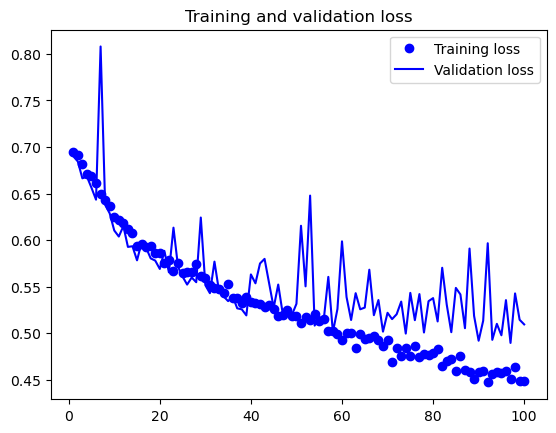

In [65]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


# ========================================================

####  Now Using Pretraind Model VGG16 For better Results

####  Importing VGG16

In [7]:
from tensorflow.keras.applications import VGG16

####  Loading VGG16

In [8]:
conv = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))

#### Summary

In [9]:
conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

#### Using Generators and Make Feature Extraction Method

In [10]:
data_gen = ImageDataGenerator(rescale=1./255)
batch_size = 20


def feature_extraction(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = data_gen.flow_from_directory(directory,target_size=(150, 150),batch_size=batch_size,class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
        
        
    
    
    

#### Apply Feature Extraction On Training,Test and Validation Data

In [31]:
train_features,train_labels = feature_extraction(train_dir,2000)
print('============================================================')
test_features,test_labels = feature_extraction(test_dir,1000)
print('============================================================')
validation_features,validation_labels = feature_extraction(validation_dir,1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 4s 4s/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 8s 8s/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 9s 9s/step


#### Reshape Feature Extraction array into 1D

In [34]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
test_features = np.reshape(test_features,(1000,4*4*512))
validation_features = np.reshape(validation_features,(1000,4*4*512))

####  Model Architecture

In [45]:
model= models.Sequential()
model.add(layers.Flatten())
# model.add(layers.Dense(256,activation='relu',input_dim=(4*4*512)))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),loss='binary_crossentropy',metrics=['acc'])

####  Training Model on Extracted Features

In [46]:
history = model.fit(train_features,train_labels,epochs=30,validation_data=(validation_features,validation_labels))

Epoch 1/30
63/63 [==============================] - 2s 27ms/step - loss: 0.5912 - acc: 0.6870 - val_loss: 0.4575 - val_acc: 0.8470
Epoch 2/30
63/63 [==============================] - 2s 26ms/step - loss: 0.4461 - acc: 0.8010 - val_loss: 0.3811 - val_acc: 0.8630
Epoch 3/30
63/63 [==============================] - 2s 25ms/step - loss: 0.3781 - acc: 0.8380 - val_loss: 0.3398 - val_acc: 0.8790
Epoch 4/30
63/63 [==============================] - 2s 24ms/step - loss: 0.3324 - acc: 0.8650 - val_loss: 0.3171 - val_acc: 0.8870
Epoch 5/30
63/63 [==============================] - 2s 24ms/step - loss: 0.3024 - acc: 0.8770 - val_loss: 0.3021 - val_acc: 0.8870
Epoch 6/30
63/63 [==============================] - 2s 24ms/step - loss: 0.2868 - acc: 0.8860 - val_loss: 0.2828 - val_acc: 0.8930
Epoch 7/30
63/63 [==============================] - 1s 24ms/step - loss: 0.2689 - acc: 0.8895 - val_loss: 0.2731 - val_acc: 0.8940
Epoch 8/30
63/63 [==============================] - 2s 24ms/step - loss: 0.2504 - a

#### Visualizing Training Results

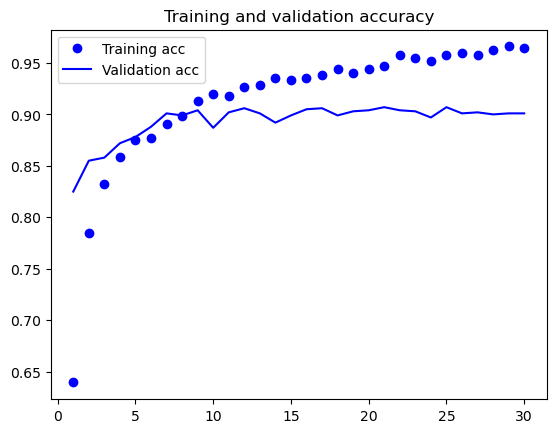

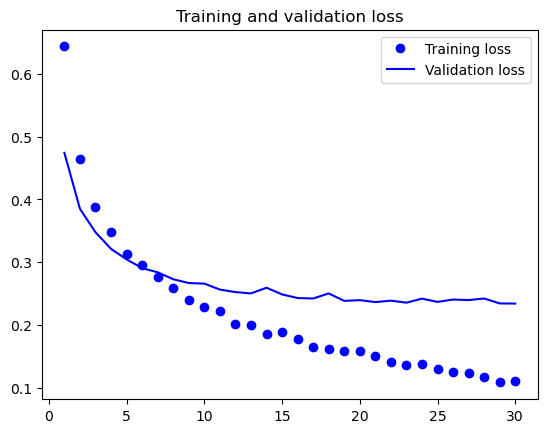

In [43]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

=================================================================================================================

####  Apply Fine Tunning

In [27]:
model = models.Sequential()
model.add(conv)
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),loss='binary_crossentropy',metrics=['acc'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 18910017 (72.14 MB)
Trainable params: 18910017 (72.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


####  Checking Trainable Weights Of the Model

In [13]:
print(len(model.trainable_weights))

30


#### Freezing Pretrained Convent 

In [14]:
conv.trainable = False
print(len(model.trainable_weights))

4


In [17]:
train_gen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.2,vertical_flip=True,horizontal_flip=True,rotation_range=40,height_shift_range=0.2,width_shift_range=0.2,fill_mode='nearest')
validation_gen = ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_gen.flow_from_directory(train_dir,target_size=(150,150),class_mode='binary',batch_size=20)
validation_generator = validation_gen.flow_from_directory(validation_dir,target_size=(150,150),class_mode='binary',batch_size=20)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(train_generator,epochs=30,steps_per_epoch=100,validation_data=validation_generator,validation_steps=50)

/tmp/ipykernel_4364/1824740868.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,epochs=30,steps_per_epoch=100,validation_data=validation_generator,validation_steps=50)


Epoch 1/30
100/100 [==============================] - 2231s 22s/step - loss: 0.6667 - acc: 0.6125 - val_loss: 0.4496 - val_acc: 0.7990
Epoch 2/30
100/100 [==============================] - 3734s 38s/step - loss: 0.5126 - acc: 0.7550 - val_loss: 0.2904 - val_acc: 0.8780
Epoch 3/30
100/100 [==============================] - 3044s 31s/step - loss: 0.4123 - acc: 0.8135 - val_loss: 0.2710 - val_acc: 0.8910
Epoch 4/30
100/100 [==============================] - 3121s 31s/step - loss: 0.3533 - acc: 0.8530 - val_loss: 0.2940 - val_acc: 0.8820
Epoch 5/30
100/100 [==============================] - 2473s 25s/step - loss: 0.3305 - acc: 0.8630 - val_loss: 0.2133 - val_acc: 0.9120
Epoch 6/30
100/100 [==============================] - 2344s 23s/step - loss: 0.3091 - acc: 0.8695 - val_loss: 0.2045 - val_acc: 0.9170
Epoch 7/30
100/100 [==============================] - 2577s 26s/step - loss: 0.2792 - acc: 0.8820 - val_loss: 0.1634 - val_acc: 0.9340
Epoch 8/30
 35/100 [=========>....................] - E

In [19]:
conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

#### Freezing Convent Except Lower Layers For Fine Tuning 

In [33]:
conv.trainable = True
set_trainable = False
for layer in conv.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

#### Making ModelArchitecture

In [38]:
model = models.Sequential()
model.add(conv)
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),loss='binary_crossentropy',metrics=['acc'])

#### Checking Model Trainable and Non Trainable parameters

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               4194816   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 18910017 (72.14 MB)
Trainable params: 11274753 (43.01 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [37]:
print(len(model.trainable_weights))

6


#### Training Or Fitting Model on training Data

In [ ]:
history  = model.fit_generator(train_generator,epochs=100,steps_per_epoch =100, validation_data=validation_generator,validation_steps=50)

/tmp/ipykernel_3285/3011347787.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history  = model.fit_generator(train_generator,epochs=100,steps_per_epoch =100, validation_data=validation_generator,validation_steps=50)


Epoch 1/100
100/100 [==============================] - 838s 8s/step - loss: 0.5946 - acc: 0.6795 - val_loss: 0.4432 - val_acc: 0.8020
Epoch 2/100
100/100 [==============================] - 983s 10s/step - loss: 0.5391 - acc: 0.7305 - val_loss: 0.3713 - val_acc: 0.8450
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 0.4936 - acc: 0.7715